# **Project name : Airbnb data analysis**

 
#**Project summary :**
This is an eda project in which I have to do data analysis by perfroming operations on data given.
16 columns in total, like id which represent unique_id, neighbourhood, neighbourhood_group which represents the area and location of the listing, name represents name of the listing, host_id represents id number of host, name_of_host represents name of the host, latitud and longititude represents range, room_type represents type of room , price represents pricing, minimum_nights represents minimum nights guest has to book room for, number_of_review represents number of reviews got,last_review represents last review got , reviews_per_month represents reviews got per month, calculated_host_listing_count represents count of listing, availability_365 represents availability of room throught the year or 365 days. My task is to explore and analyze data and discover key understanding. I have to first deal with null values and have to remove any null values from the dataset, and will then solve some questions related to the dataset provided.

# **Importing libraries and file into colab notebook:**

In [ ]:

#importing required libraries :

import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns


In [ ]:

#connecting google drive to colab:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

# assigning path to path of csv:

path_csv = "/content/drive/MyDrive/Airbnb NYC 2019.csv"

In [ ]:

# reading csv file in colab:

df = pd.read_csv(path_csv)


In [ ]:

#printing dataframe:

df.head()


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
df[['neighbourhood','minimum_nights']].sort_values('minimum_nights')

,neighbourhood,minimum_nights
0,Kensington,1
16078,Hell's Kitchen,1
16090,East Harlem,1
16096,Clinton Hill,1
16099,Crown Heights,1
...,...,...
13404,Harlem,999
26341,Williamsburg,999
38664,Greenwich Village,999
2854,Battery Park City,1000


#**Know Your data**

In [ ]:

#Baic checking on dataframe:

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [ ]:

#checking shape of dataframe:

df.shape


(48895, 16)

In [ ]:

# Taking necessary columns in dataframe :

dff = df.drop(columns = ['availability_365', 'latitude', 'longitude', 'last_review'])


In [ ]:

#printing and checking new modified dataframe:

dff.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   room_type                       48895 non-null  object 
 7   price                           48895 non-null  int64  
 8   minimum_nights                  48895 non-null  int64  
 9   number_of_reviews               48895 non-null  int64  
 10  reviews_per_month               38843 non-null  float64
 11  calculated_host_listings_count  48895 non-null  int64  
dtypes: float64(1), int64(6), object(

# **Data wrangling:**

In [ ]:

#handeling null values :

dff.isna().sum()


id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
dtype: int64

In [ ]:

# calculating mean values of column reviews_per_month:

mean_values = dff.reviews_per_month.mean()

mean_values


1.3732214298586618

In [ ]:

# filling nullvalues with calculated mean values:

dff['reviews_per_month'].fillna(value=mean_values, inplace= True)


In [ ]:

#Again checking null values

dff.isna().sum()


id                                 0
name                              16
host_id                            0
host_name                         21
neighbourhood_group                0
neighbourhood                      0
room_type                          0
price                              0
minimum_nights                     0
number_of_reviews                  0
reviews_per_month                  0
calculated_host_listings_count     0
dtype: int64

In [ ]:
dff.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,Private room,149,1,9,0.210000,6
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,Entire home/apt,225,1,45,0.380000,2
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,Private room,150,3,0,1.373221,1
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,4.640000,1
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,Entire home/apt,80,10,9,0.100000,1


#*** Problem statements: ***


1. Are private rooms preffered over other room types.
2. Is Manhattan neibhourhood more preffered over other        neighbourhood.
3. which are the top 5 areas with the most no of hosts.
4. Top 5 most busiest hosts.
5. what is the average price for each room type.
6. most no of reviews are from which location.




# **Q1. Are private rooms preffered over other room types.**

In [ ]:

# finding unique room types:

room_types_unique = dff['room_type'].unique()

room_types_unique


array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [ ]:

#Here we grouped number of reviews for each room type. 

dff_room_types = dff.groupby('room_type')['number_of_reviews'].sum()


In [ ]:
dff_room_types.reset_index()

,room_type,number_of_reviews
0,Entire home/apt,580403
1,Private room,538346
2,Shared room,19256


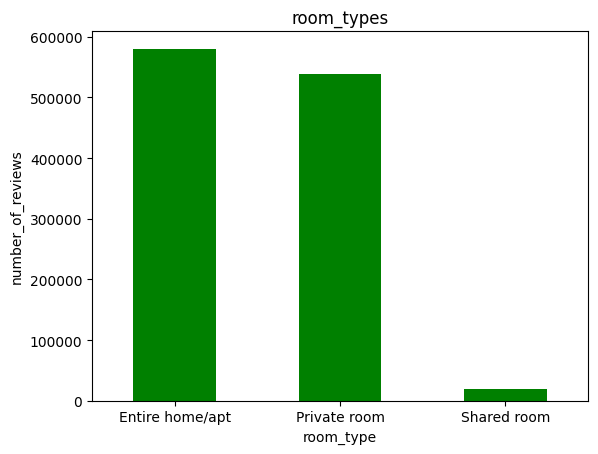

In [ ]:
#visualizing

dff_room_types.plot(kind='bar', color = 'green',width = 0.5)

plt.title('room_types')

plt.xlabel('room_type', )

plt.ylabel('number_of_reviews')

plt.xticks(rotation=0)

plt.show()

 A1 - Above numbers shows that 'Entire home/apt' are being most booked which makes them most preffered room type followed by private room and least prefferd room type is shared rooms.

#  ****Q2 Is Manhattan neibhourhood more preffered over other neighbourhood ****

In [ ]:
dff.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,Private room,149,1,9,0.210000,6
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,Entire home/apt,225,1,45,0.380000,2
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,Private room,150,3,0,1.373221,1
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,4.640000,1
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,Entire home/apt,80,10,9,0.100000,1


In [ ]:

neighbourhood_groups = dff['neighbourhood_group'].unique()

neighbourhood_groups


array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [ ]:

grouped_data2 = dff.groupby('neighbourhood_group')['number_of_reviews'].sum().reset_index().set_index('neighbourhood_group')

grouped_data2.sort_values(by=['number_of_reviews'], ascending = False)


,number_of_reviews
neighbourhood_group,
Brooklyn,486574
Manhattan,454569
Queens,156950
Bronx,28371
Staten Island,11541


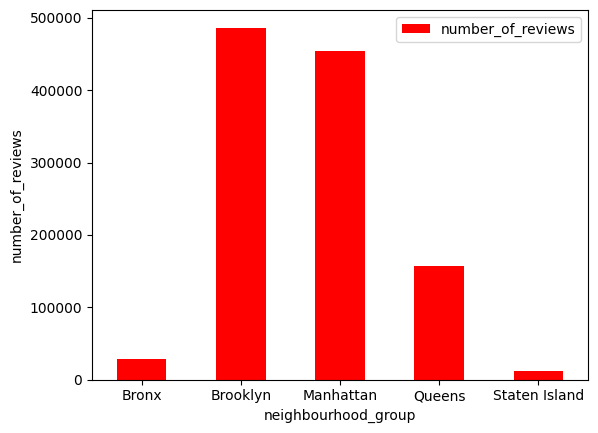

In [ ]:

grouped_data2.plot(kind='bar',color = 'red')

plt.xlabel('neighbourhood_group')

plt.ylabel('number_of_reviews')

plt.xticks(rotation=0)

plt.show()


**A2 : No, Manhattan is not preffered over other neighbourhood brooklyn is more preffered**

# **Q3: which are the top 5 areas with the most no of hosts**

In [ ]:
dff.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,Private room,149,1,9,0.210000,6
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,Entire home/apt,225,1,45,0.380000,2
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,Private room,150,3,0,1.373221,1
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,4.640000,1
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,Entire home/apt,80,10,9,0.100000,1


In [ ]:
host_per_area = dff.groupby('neighbourhood')['host_name'].count().reset_index(name='host_count').sort_values(by='host_count', ascending=False).head(10)

In [ ]:
host_per_area.head(5)

,neighbourhood,host_count
214,Williamsburg,3919
13,Bedford-Stuyvesant,3714
94,Harlem,2656
28,Bushwick,2464
202,Upper West Side,1970


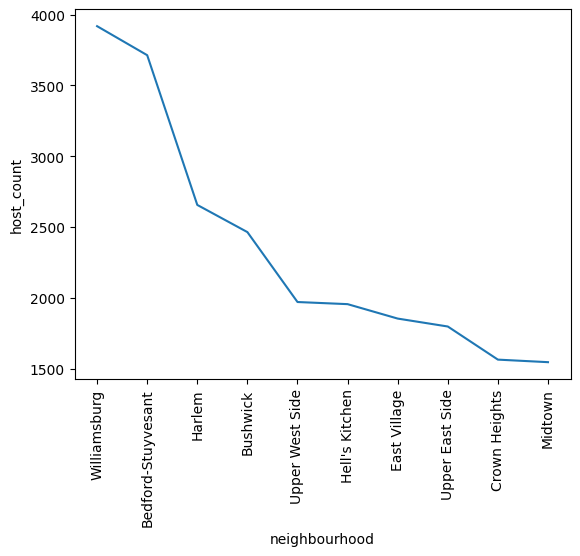

In [ ]:

sns.lineplot(data=host_per_area,x='neighbourhood', y='host_count')

plt.xticks(rotation=90)

plt.show()


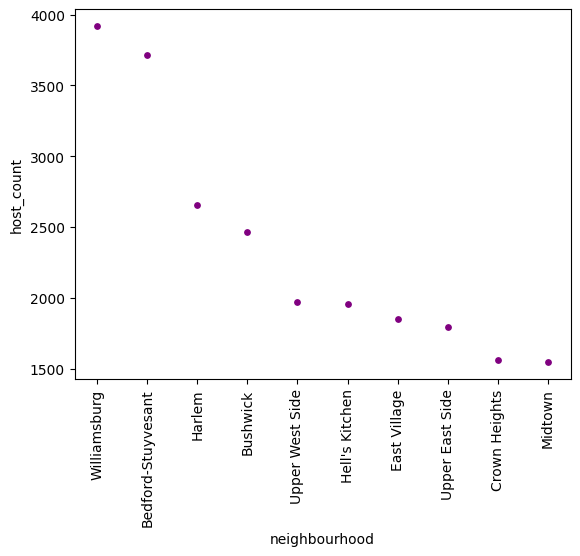

In [ ]:

x = host_per_area['neighbourhood']

y = host_per_area['host_count']

plt.xlabel('neighbourhood')

plt.ylabel('host_count')

plt.scatter(x,y,color = 'purple',s =15)

plt.xticks(rotation=90)

plt.show()


#**Q4 : Top 5 most busiest hosts:**

In [ ]:
dff.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,Private room,149,1,9,0.210000,6
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,Entire home/apt,225,1,45,0.380000,2
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,Private room,150,3,0,1.373221,1
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,4.640000,1
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,Entire home/apt,80,10,9,0.100000,1


In [ ]:
busiest_host = dff.groupby(['host_name','room_type'])['number_of_reviews'].sum().reset_index().sort_values(by='number_of_reviews', ascending=False)

In [ ]:
busiest_host.head(6)

,host_name,room_type,number_of_reviews
9171,Michael,Entire home/apt,6598
3084,David,Entire home/apt,4542
9172,Michael,Private room,4372
6415,John,Private room,4030
5949,Jason,Entire home/apt,3841
413,Alex,Entire home/apt,3586


In [ ]:

bh_u = busiest_host[['host_name','number_of_reviews']].set_index('host_name').head(6)

bh_u


,number_of_reviews
host_name,
Michael,6598
David,4542
Michael,4372
John,4030
Jason,3841
Alex,3586


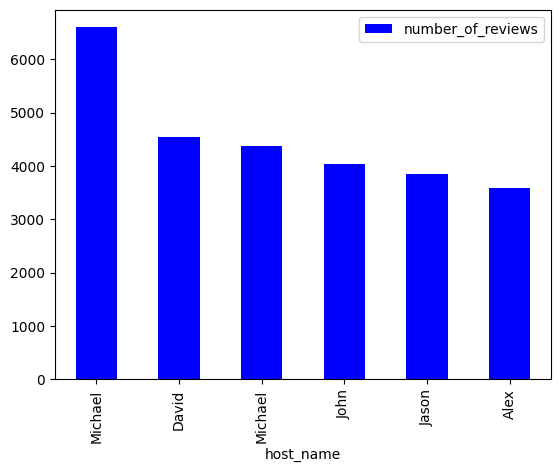

In [ ]:

bh_u.plot(kind='bar',color='b')

plt.show()


**Above observations shows that Michael, David, John, Jason and Alex are the top five hosts.**



#**Q5: what is the average price for each room type.**

In [ ]:
average_price = dff.groupby('room_type')['price'].mean().reset_index()

In [ ]:
average_price

,room_type,price
0,Entire home/apt,211.794246
1,Private room,89.780973
2,Shared room,70.127586


Text(0, 0.5, 'price')

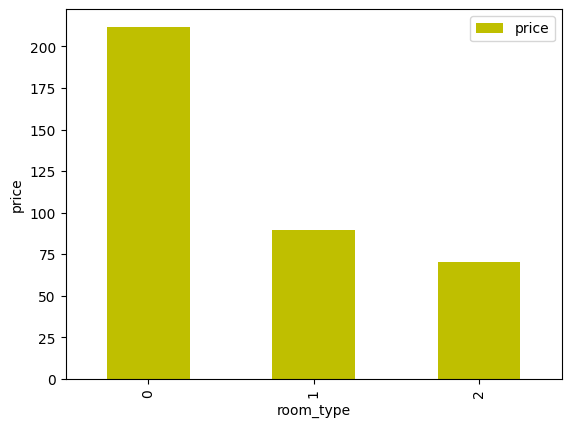

In [ ]:

average_price.plot(kind='bar' , color = 'y')

plt.xlabel('room_type')

plt.ylabel('price')


 **Above mentioned are the average prices for each room type.**


#**Q6: most no of reviews are from which location.**

In [ ]:
dff.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,Private room,149,1,9,0.210000,6
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,Entire home/apt,225,1,45,0.380000,2
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,Private room,150,3,0,1.373221,1
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,4.640000,1
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,Entire home/apt,80,10,9,0.100000,1


In [ ]:

#renaming neighbourhood_group as location.

dff2 = dff.rename({'neighbourhood_group':'location', 'neighbourhood':'area'}, axis=1)

In [ ]:
dff2.head(2)

,id,name,host_id,host_name,location,area,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,Private room,149,1,9,0.21,6
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,Entire home/apt,225,1,45,0.38,2


In [ ]:

reviews_per_location = dff2.groupby('location')['number_of_reviews'].sum().reset_index().sort_values(by=['number_of_reviews'], ascending=False)

reviews_per_location


,location,number_of_reviews
1,Brooklyn,486574
2,Manhattan,454569
3,Queens,156950
0,Bronx,28371
4,Staten Island,11541


**Above observation shows that Brooklyn has got the maximum reviews.**

In [ ]:
reviews_per_roomtype_locations = dff2.groupby(['location','room_type'])['number_of_reviews'].sum().reset_index().sort_values(by=['number_of_reviews','location'], ascending=False)

reviews_per_roomtype_locations

#This observation shows that Brooklns Entire home/apt and Private room type has the highest number of reviews 

#whereas Manhattans shared room room type has the highest review.

,location,room_type,number_of_reviews
3,Brooklyn,Entire home/apt,267128
6,Manhattan,Entire home/apt,235147
4,Brooklyn,Private room,213653
7,Manhattan,Private room,209150
10,Queens,Private room,93561
9,Queens,Entire home/apt,60644
1,Bronx,Private room,16312
0,Bronx,Entire home/apt,11627
8,Manhattan,Shared room,10272
12,Staten Island,Entire home/apt,5857


Text(0.5, 1.0, 'location X reviews')

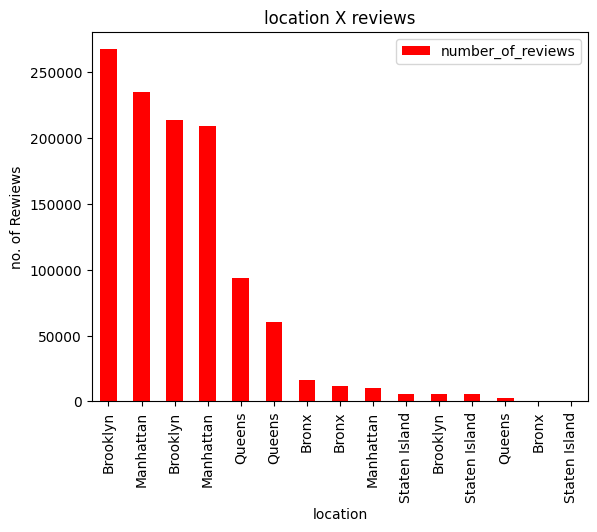

In [ ]:

reviews_per_roomtype_locations.set_index('location').plot( kind='bar',color = 'red')

plt.xlabel('location')

plt.ylabel('no. of Rewiews')

plt.title('location X reviews')


#**Visualization**

**Q7. Distribution of listing across the neighbourhood.**

In [ ]:
listing_X_neighbourhood = dff[['neighbourhood', 'calculated_host_listings_count']].sort_values('calculated_host_listings_count')

In [ ]:
listing_X_neighbourhood

,neighbourhood,calculated_host_listings_count
24447,Williamsburg,1
27993,Midtown,1
27995,East Village,1
27996,Hell's Kitchen,1
27999,Astoria,1
...,...,...
41466,Financial District,327
41467,Financial District,327
41468,Financial District,327
41470,Financial District,327


In [ ]:
df1=listing_X_neighbourhood.groupby('neighbourhood')['calculated_host_listings_count'].sum()

In [ ]:
df1 =df1.reset_index()

In [ ]:
last_df1 = df1.sort_values('calculated_host_listings_count').tail()

<Axes: xlabel='neighbourhood'>

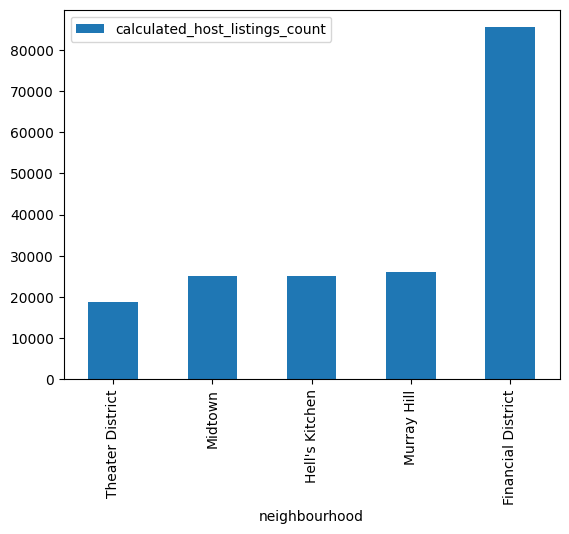

In [ ]:
last_df1.plot(x='neighbourhood',y='calculated_host_listings_count',kind='bar')

#**Observations: **
Below are the observations that have been noticed:


1.   Entire home/apt are most perffered type of rooms. so, hostings of Entire home/apt has to be listed and shown most to the client for easy access of facilities.

2.   It is seen that clients preffers Brooklyn as their favourite neighbourhood. so, listings from Brooklyn must be increased.

3. It is also seen that 'Williamsburg, Bedford-Stuyvesant,	Harlem, Bushwick, Upper West Side' are the neighbourhood with most number of hosts.

4. 	Michael, David, John, Jason and Alex are the top five hosts, so it will be a good idea to provide them with some consesions or gifts to increase their loyality with the organization.

5. Below mentioned are the average room prices: 
   Entire home/apt - $211.794246, 
   Private room	- $89.780973 ,
   Shared room - $70.127586.

6. Brooklyn has the most number of reviews, which means that clients preffers Brooklyn as a good place for their accomodation.


